Importing the required Libraries

In [1]:
!pip install --upgrade scikit-learn

In [2]:
#importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [3]:
#reading the given dataset

df = pd.read_csv('/content/MFGEmployees4.csv')
df

,EmployeeNumber,Surname,GivenName,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
0,1,Gutierrez,Molly,F,Burnaby,Baker,Bakery,Burnaby,Stores,32.028816,6.018478,36.577306,Stores
1,2,Hardwick,Stephen,M,Courtenay,Baker,Bakery,Nanaimo,Stores,40.320902,5.532445,30.165072,Stores
2,3,Delgado,Chester,M,Richmond,Baker,Bakery,Richmond,Stores,48.822047,4.389973,83.807798,Stores
3,4,Simon,Irene,F,Victoria,Baker,Bakery,Victoria,Stores,44.599357,3.081736,70.020165,Stores
4,5,Delvalle,Edward,M,New Westminster,Baker,Bakery,New Westminster,Stores,35.697876,3.619091,0.000000,Stores
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8331,8332,Coniglio,Bianca,F,Langley,Cashier,Customer Service,Langley,Stores,46.057544,4.838288,93.665111,Stores
8332,8333,Cox,Jimmie,M,Montney,Cashier,Customer Service,Fort St John,Stores,34.455490,2.427274,0.000000,Stores
8333,8334,Hawkins,Mary,F,West Vancouver,Cashier,Customer Service,West Vancouver,Stores,58.347160,4.009393,176.356940,Stores
8334,8335,Proctor,Theresa,F,Vancouver,Dairy Person,Dairy,Vancouver,Stores,43.340616,6.154837,60.321917,Stores


Checking for any Null values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8336 entries, 0 to 8335
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   EmployeeNumber  8336 non-null   int64  
 1   Surname         8336 non-null   object 
 2   GivenName       8336 non-null   object 
 3   Gender          8336 non-null   object 
 4   City            8336 non-null   object 
 5   JobTitle        8336 non-null   object 
 6   DepartmentName  8336 non-null   object 
 7   StoreLocation   8336 non-null   object 
 8   Division        8336 non-null   object 
 9   Age             8336 non-null   float64
 10  LengthService   8336 non-null   float64
 11  AbsentHours     8336 non-null   float64
 12  BusinessUnit    8336 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 846.8+ KB


In [5]:
df.isnull().any()

EmployeeNumber    False
Surname           False
GivenName         False
Gender            False
City              False
JobTitle          False
DepartmentName    False
StoreLocation     False
Division          False
Age               False
LengthService     False
AbsentHours       False
BusinessUnit      False
dtype: bool

In [6]:
df.isnull().sum()

EmployeeNumber    0
Surname           0
GivenName         0
Gender            0
City              0
JobTitle          0
DepartmentName    0
StoreLocation     0
Division          0
Age               0
LengthService     0
AbsentHours       0
BusinessUnit      0
dtype: int64

Label Encoding

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Surname'] = le.fit_transform(df['Surname'])

In [8]:
df['GivenName'] = le.fit_transform(df['GivenName'])

In [9]:
df['Gender'] = le.fit_transform(df['Gender'])

In [10]:
df['City'] = le.fit_transform(df['City'])

In [11]:
df['JobTitle'] = le.fit_transform(df['JobTitle'])

In [12]:
df['DepartmentName'] = le.fit_transform(df['DepartmentName'])

In [13]:
df['StoreLocation'] = le.fit_transform(df['StoreLocation'])

In [14]:
df['Division'] = le.fit_transform(df['Division'])

In [15]:
df['BusinessUnit'] = le.fit_transform(df['BusinessUnit'])

In [16]:
Y = df['AbsentHours'].values

In [17]:
df

,EmployeeNumber,Surname,GivenName,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
0,1,1555,1140,0,28,4,4,4,5,32.028816,6.018478,36.577306,1
1,2,1617,1452,1,51,4,4,17,5,40.320902,5.532445,30.165072,1
2,3,940,264,1,179,4,4,28,5,48.822047,4.389973,83.807798,1
3,4,3414,687,0,226,4,4,36,5,44.599357,3.081736,70.020165,1
4,5,945,449,1,143,4,4,20,5,35.697876,3.619091,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8331,8332,765,159,0,120,9,6,16,5,46.057544,4.838288,93.665111,1
8332,8333,818,770,1,137,9,6,11,5,34.455490,2.427274,0.000000,1
8333,8334,1661,1072,0,228,9,6,37,5,58.347160,4.009393,176.356940,1
8334,8335,2985,1504,0,222,14,7,34,5,43.340616,6.154837,60.321917,1


Multivariate Analysis

<Axes: >

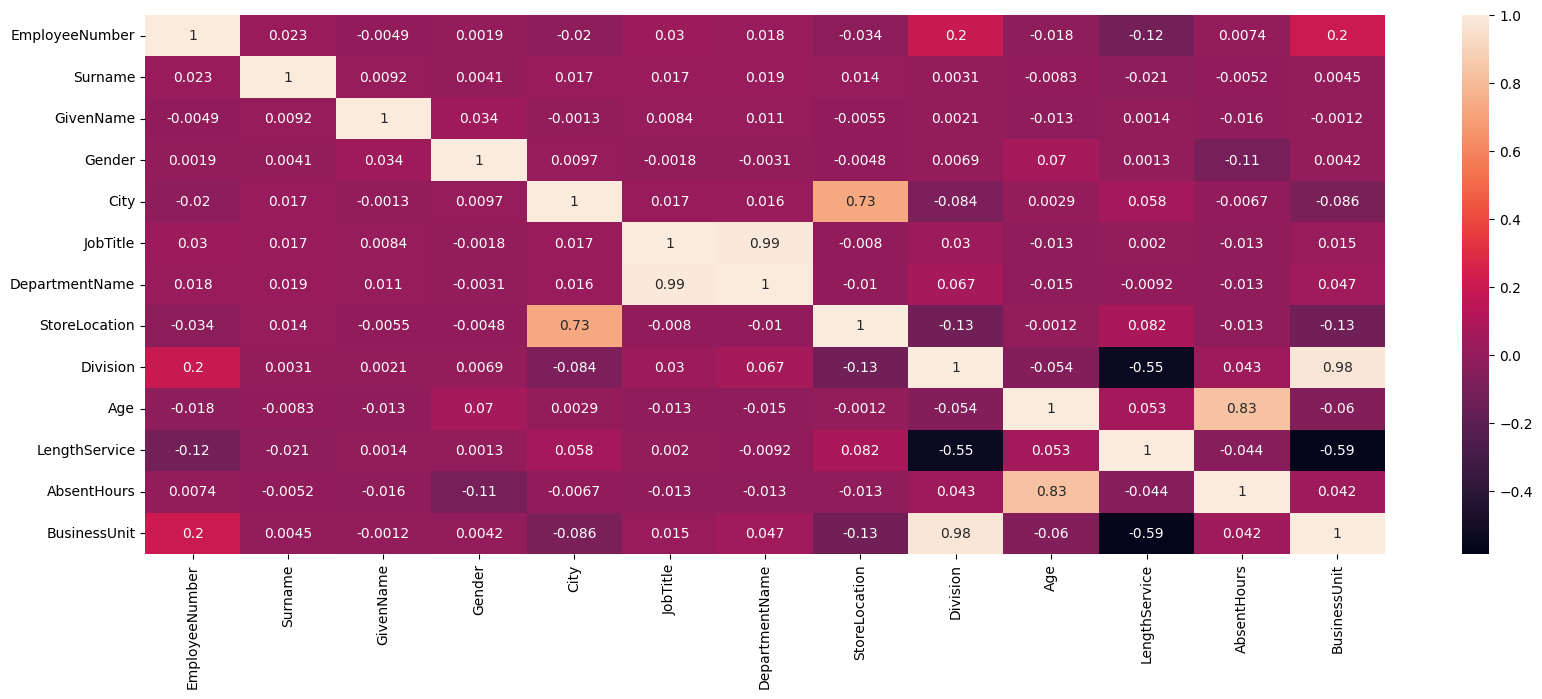

In [18]:
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(), annot = True)

In [19]:
df = df.drop(['AbsentHours'], axis=1)

In [20]:
import warnings
warnings.filterwarnings('ignore')

Applying PCA

In [21]:
from sklearn.decomposition import PCA
selected_features = df
pca = PCA(n_components=8)
Features = pca.fit_transform(selected_features)
loadings = pca.components_[0]

loading_df = pd.DataFrame({'Feature': selected_features.columns, 'Loading': loadings})

loading_df['Abs_Loading'] = loading_df['Loading'].abs()
loading_df = loading_df.sort_values(by='Abs_Loading', ascending=False)

print(loading_df)

           Feature       Loading   Abs_Loading
0   EmployeeNumber  9.998912e-01  9.998912e-01
1          Surname  1.470438e-02  1.470438e-02
2        GivenName -9.604284e-04  9.604284e-04
4             City -5.900330e-04  5.900330e-04
5         JobTitle  1.757749e-04  1.757749e-04
7    StoreLocation -1.526559e-04  1.526559e-04
10   LengthService -1.225627e-04  1.225627e-04
9              Age -7.640129e-05  7.640129e-05
8         Division  4.167458e-05  4.167458e-05
6   DepartmentName  3.926796e-05  3.926796e-05
11    BusinessUnit  1.199078e-05  1.199078e-05
3           Gender  4.078008e-07  4.078008e-07


In [22]:
useful_cols = ['EmployeeNumber', 'Surname', 'GivenName', 'City', 'JobTitle', 'StoreLocation', 'LengthService', 'Age']

In [23]:
df = df[useful_cols]
df.shape

(8336, 8)

In [24]:
df

,EmployeeNumber,Surname,GivenName,City,JobTitle,StoreLocation,LengthService,Age
0,1,1555,1140,28,4,4,6.018478,32.028816
1,2,1617,1452,51,4,17,5.532445,40.320902
2,3,940,264,179,4,28,4.389973,48.822047
3,4,3414,687,226,4,36,3.081736,44.599357
4,5,945,449,143,4,20,3.619091,35.697876
...,...,...,...,...,...,...,...,...
8331,8332,765,159,120,9,16,4.838288,46.057544
8332,8333,818,770,137,9,11,2.427274,34.455490
8333,8334,1661,1072,228,9,37,4.009393,58.347160
8334,8335,2985,1504,222,14,34,6.154837,43.340616


In [25]:
X = df.values

Splitting the data into Train and test

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

Training the model

In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [28]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, model.predict(x_test))

In [29]:
mse

721.2952167326168

In [30]:
from sklearn.linear_model import Lasso
lr = Lasso(alpha = 1.5e-08, max_iter = 100000)
lr.fit(x_train, y_train)

Lasso(alpha=1.5e-08, max_iter=100000)

In [31]:
mse1 = mean_squared_error(y_test, lr.predict(x_test))
mse1

721.2952167349414

In [32]:
from sklearn.linear_model import Ridge
Rr = Ridge(alpha = 1)
Rr.fit(x_train, y_train)

Ridge(alpha=1)

In [33]:
mse2 = mean_squared_error(y_test, Rr.predict(x_test))
mse2

721.2952549527712

In [34]:
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor()
model1.fit(x_train, y_train)

RandomForestRegressor()

In [35]:
mse3 = mean_squared_error(y_test, model1.predict(x_test))
mse3

693.8762375971518

Comparing the best model

In [36]:
mses = [['LinearRegression', mse], ['LassoRegression', mse1],
        ['RidgeRegression', mse2], ['RandomForestRegressor', mse3]]

Absenteeism_at_Work_Prediction = pd.DataFrame(mses, columns = ['RegressionModels', 'MeanSquaredError'])
Absenteeism_at_Work_Prediction

,RegressionModels,MeanSquaredError
0,LinearRegression,721.295217
1,LassoRegression,721.295217
2,RidgeRegression,721.295255
3,RandomForestRegressor,693.876238


Saving The best model

In [37]:
import pickle
pickle.dump(model1, open('Absentmodel.pkl', 'wb'))

In [38]:
import pickle
pickle.dump(model, open('Lrmodel.pkl', 'wb'))